<a href="https://colab.research.google.com/github/firouzdimas/PunyaDewo/blob/main/22_R_Final_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install required packages
install.packages("palmerpenguins")
install.packages("tidyverse")
library(palmerpenguins)
library(tidyr)
library(dplyr)
library(stringr)
library(purrr)
library(ggplot2)
library(readr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# read dataset
bars_df <- read_csv("flavors_of_cacao.csv")

Rows: 1795 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (6): Company 
(Maker-if known), Specific Bean Origin
or Bar Name, Cocoa
...
dbl (3): REF, Review
Date, Rating

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [ ]:
# View dataset
glimpse(bars_df)
head(bars_df)

Rows: 1,795
Columns: 9
$ `Company \n(Maker-if known)`        <chr> "A. Morin", "A. Morin", "A. Morin"…
$ `Specific Bean Origin\nor Bar Name` <chr> "Agua Grande", "Kpime", "Atsane", …
$ REF                                 <dbl> 1876, 1676, 1676, 1680, 1704, 1315…
$ `Review\nDate`                      <dbl> 2016, 2015, 2015, 2015, 2015, 2014…
$ `Cocoa\nPercent`                    <chr> "63%", "70%", "70%", "70%", "70%",…
$ `Company\nLocation`                 <chr> "France", "France", "France", "Fra…
$ Rating                              <dbl> 3.75, 2.75, 3.00, 3.50, 3.50, 2.75…
$ `Bean\nType`                        <chr> " ", " ", " ", " ", " ", "Criollo"…
$ `Broad Bean\nOrigin`                <chr> "Sao Tome", "Togo", "Togo", "Togo"…


Company (Maker-if known),Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>
A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru
A. Morin,Carenero,1315,2014,70%,France,2.75,Criollo,Venezuela


In [ ]:
# Rename collumns dataset
flavors_df <- bars_df %>%
  rename_with(tolower) %>%
  rename(review_date='review\ndate', 
         brand='company \n(maker-if known)',
         specific_bean_origin_or_bar_name='specific bean origin\nor bar name',
         cocoa_percent='cocoa\npercent',
         company_location='company\nlocation',
         bean_type='bean\ntype',
         broad_bean='broad bean\norigin') %>% 
  drop_na()

head(flavors_df)

brand,specific_bean_origin_or_bar_name,ref,review_date,cocoa_percent,company_location,rating,bean_type,broad_bean
<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>
A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru
A. Morin,Carenero,1315,2014,70%,France,2.75,Criollo,Venezuela


In [ ]:
# Subset rating , cocoa percent, and bean type collumns
trimmed_flavors_df <- flavors_df %>%
  select(rating, cocoa_percent, bean_type)
head(trimmed_flavors_df)

rating,cocoa_percent,bean_type
<dbl>,<chr>,<chr>
3.75,63%,
2.75,70%,
3.00,70%,
3.50,70%,
3.50,70%,
2.75,70%,Criollo


In [ ]:
# Calculate standart deviation of rating
trimmed_flavors_df %>%
  summarise(sd(rating))

sd(rating)
<dbl>
0.4776676


In [ ]:
# Filter base rating and cocoa percent
best_trimmed_flavors_df <- trimmed_flavors_df %>%
  filter(cocoa_percent>=70, rating>=3.5)
summary(best_trimmed_flavors_df)
head(best_trimmed_flavors_df)

     rating     cocoa_percent       bean_type        
 Min.   :3.50   Length:573         Length:573        
 1st Qu.:3.50   Class :character   Class :character  
 Median :3.50   Mode  :character   Mode  :character  
 Mean   :3.65                                        
 3rd Qu.:3.75                                        
 Max.   :5.00                                        

rating,cocoa_percent,bean_type
<dbl>,<chr>,<chr>
3.50,70%,
3.50,70%,
3.50,70%,
3.50,70%,Criollo
3.75,70%,Criollo
4.00,70%,


In [ ]:
# Filtered Dataframe with full collumns
full_best_trimmed_flavors_df <- flavors_df %>%
  filter(cocoa_percent>=70, rating>=3.5)
summary(full_best_trimmed_flavors_df)
head(full_best_trimmed_flavors_df)

    brand           specific_bean_origin_or_bar_name      ref      
 Length:573         Length:573                       Min.   :   5  
 Class :character   Class :character                 1st Qu.: 701  
 Mode  :character   Mode  :character                 Median :1193  
                                                     Mean   :1117  
                                                     3rd Qu.:1582  
                                                     Max.   :1952  
  review_date   cocoa_percent      company_location       rating    
 Min.   :2006   Length:573         Length:573         Min.   :3.50  
 1st Qu.:2011   Class :character   Class :character   1st Qu.:3.50  
 Median :2013   Mode  :character   Mode  :character   Median :3.50  
 Mean   :2013                                         Mean   :3.65  
 3rd Qu.:2015                                         3rd Qu.:3.75  
 Max.   :2017                                         Max.   :5.00  
  bean_type          broad_bean       
 L

brand,specific_bean_origin_or_bar_name,ref,review_date,cocoa_percent,company_location,rating,bean_type,broad_bean
<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>
A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru
A. Morin,Cuba,1315,2014,70%,France,3.50,,Cuba
A. Morin,Sur del Lago,1315,2014,70%,France,3.50,Criollo,Venezuela
A. Morin,Puerto Cabello,1319,2014,70%,France,3.75,Criollo,Venezuela
A. Morin,Pablino,1319,2014,70%,France,4.00,,Peru


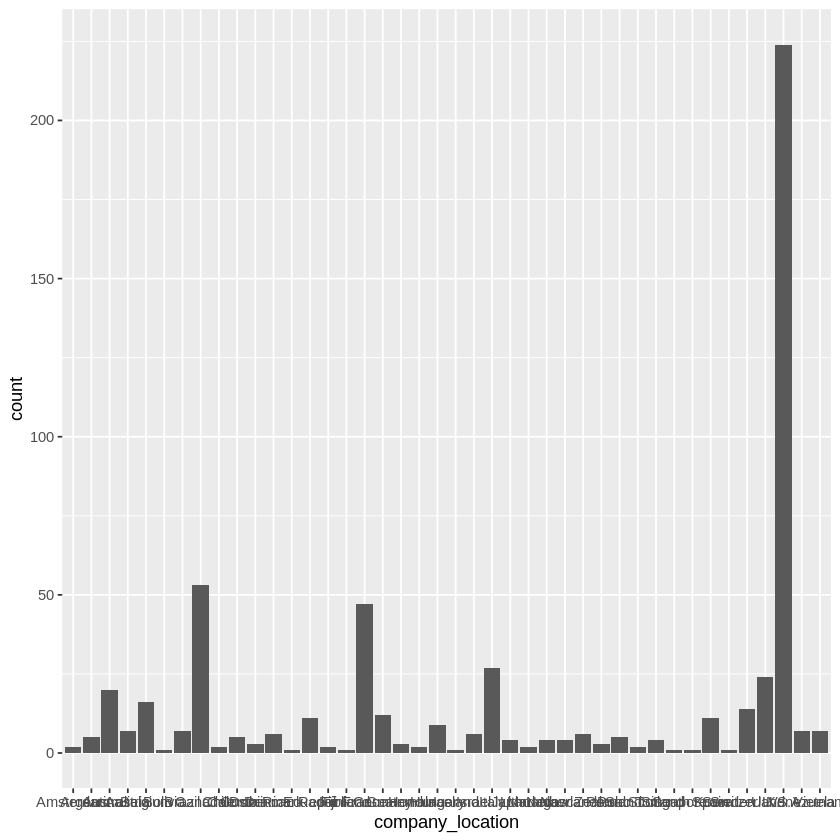

In [ ]:
# Plot base on company location
ggplot(full_best_trimmed_flavors_df) +
  geom_bar(aes(x=company_location))

In [ ]:
# View with best rating
full_best_trimmed_flavors_df %>%
  arrange(-rating)

brand,specific_bean_origin_or_bar_name,ref,review_date,cocoa_percent,company_location,rating,bean_type,broad_bean
<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>
Amedei,Chuao,111,2007,70%,Italy,5,Trinitario,Venezuela
Amedei,Toscano Black,40,2006,70%,Italy,5,Blend,
A. Morin,Pablino,1319,2014,70%,France,4,,Peru
A. Morin,Chuao,1015,2013,70%,France,4,Trinitario,Venezuela
Amano,Morobe,725,2011,70%,U.S.A.,4,,Papua New Guinea
Amano,Guayas,470,2010,70%,U.S.A.,4,,Ecuador
Amedei,Porcelana,111,2007,70%,Italy,4,Criollo (Porcelana),Venezuela
Amedei,Nine,111,2007,75%,Italy,4,Blend,
Amedei,Madagascar,123,2007,70%,Italy,4,Trinitario (85% Criollo),Madagascar


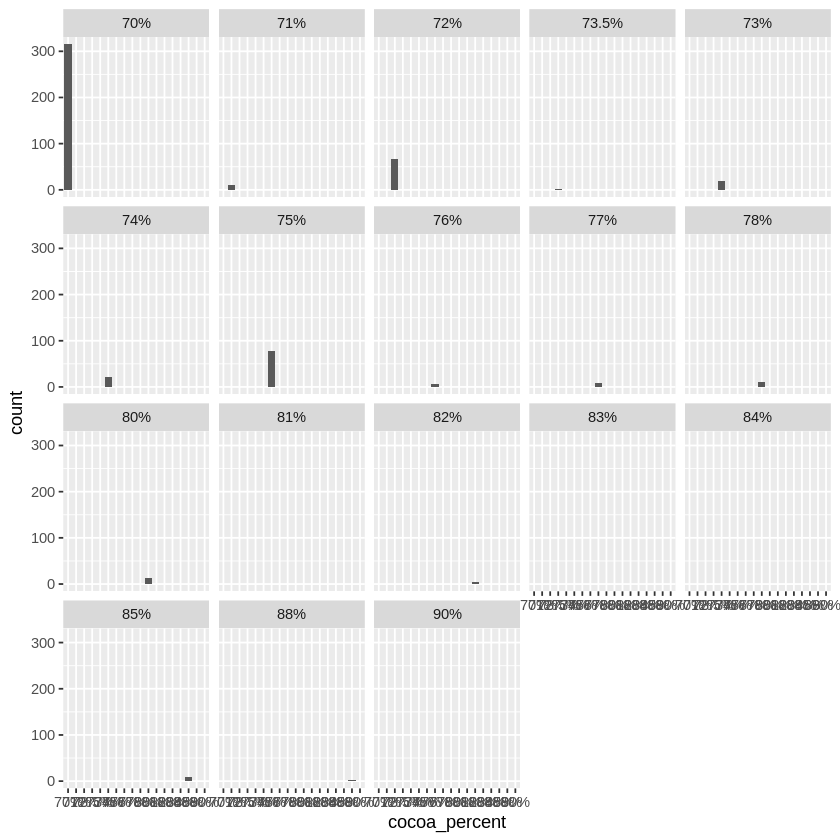

In [ ]:
# Subplot by cocoa percent
ggplot(full_best_trimmed_flavors_df) +
  geom_bar(aes(x=cocoa_percent)) +
  facet_wrap(~cocoa_percent)

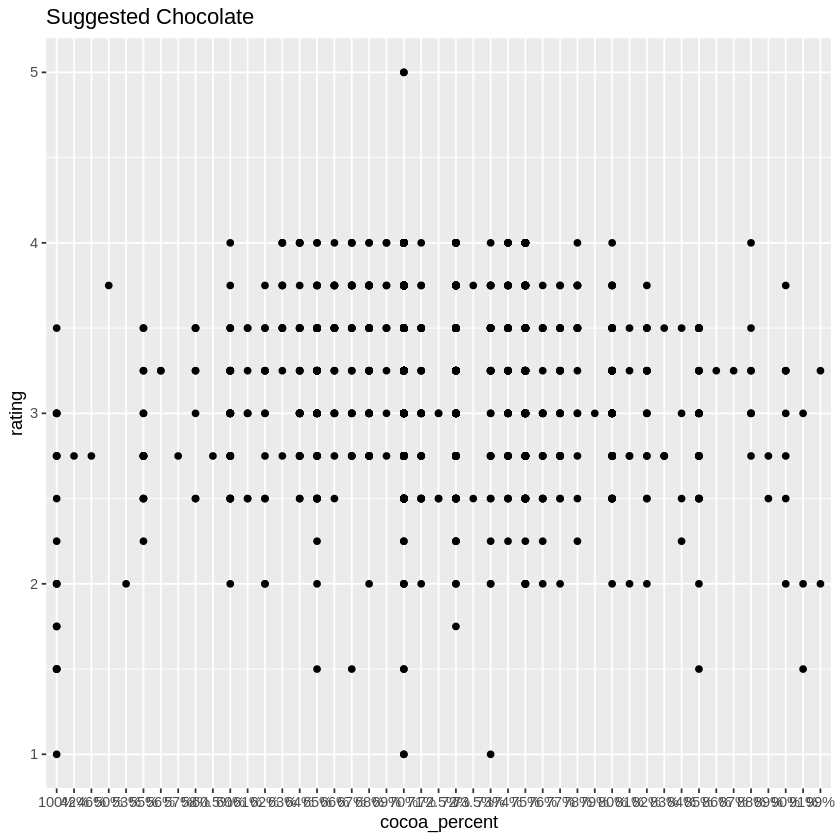

In [ ]:
# Add annotation in plot
ggplot(trimmed_flavors_df) +
  geom_point(aes(x=cocoa_percent, y=rating)) +
  labs(title="Suggested Chocolate")

In [ ]:
ggsave("chocolate.pdf")

Saving 6.67 x 6.67 in image

